##### Reviewing Bayesian Analysis with python ch1
** FOllow allong with this github repo: https://github.com/PacktPublishing/Bayesian-Analysis-with-Python/blob/master/Chapter%201/01_Thinking_Probabilistically_a_Bayesian_Inference_Primer%20(3).ipynb **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)

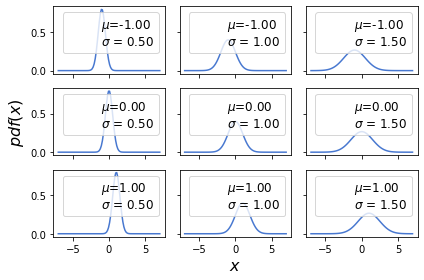

In [2]:
mu_params = [-1,0,1]
sd_params = [0.5,1,1.5]

x = np.linspace(-7,7,100)
f,ax = plt.subplots(len(mu_params),len(sd_params),sharex=True, sharey = True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd=sd_params[j]
        y = stats.norm(mu,sd).pdf(x)
        ax[i,j].plot(x,y)
        ax[i,j].plot(0,0,label = "$\\mu$={:3.2f}\n$\\sigma$ = {:3.2f}".format(mu,sd),alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$',fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$',fontsize=16)
plt.tight_layout()

##### Including Chapter 2
https://github.com/PacktPublishing/Bayesian-Analysis-with-Python/blob/master/Chapter%202/02_Programming_probabilistically_a_PyMC3_primer%20(1).ipynb

In [3]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'muted'

sns.set_palette(palette); sns.set_color_codes(palette)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [4]:
def posterior_grid(grid_points=100, heads = 6, tosses =9):
    """
    Grid implementaiton for the coin flip problem
    """
    # Define a grid
    grid=np.linspace(0,1,grid_points)
    #def prior
    prior = np.repeat(5,grid_points) # unifrm
    
    #compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(heads,tosses,grid)
    #compute product of likelihood
    unstd_posterior = likelihood*prior
    #standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid,posterior

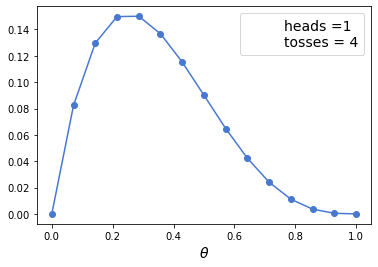

In [7]:
points=15
h,n = 1,4
grid,posterior = posterior_grid(points,h,n)
plt.plot(grid,posterior,'o-')
plt.plot(0,0,label='heads ={}\ntosses = {}'.format(h,n),alpha=0)
plt.xlabel(r'$\theta$',fontsize=14)
plt.legend(loc=0,fontsize=14)

##### Monte Carlo

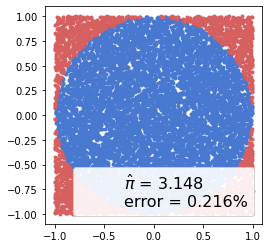

In [9]:
N = 10000
x,y = np.random.uniform(-1,1,size=(2,N))
inside = (x**2+ y**2)<=1
pi = inside.sum()*4/N
error = abs((pi-np.pi)/pi)*100
outside = np.invert(inside)

plt.plot(x[inside],y[inside],'b.')
plt.plot(x[outside],y[outside],'r.')
plt.plot(0,0,label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi,error),alpha=0)
plt.axis('square')
plt.legend(frameon=True, framealpha=0.9,fontsize=16);

##### Metropolis

In [12]:
def metropolis(func,steps=10000):
    """ A very simple metropolis implementation"""
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob=func.pdf(old_x)
    
    for i in range(steps):
        new_x=old_x+np.random.normal(0,1)
        new_prob = func.pdf(new_x)
        acceptance = new_prob/old_prob
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    return samples

AttributeError: 'Rectangle' object has no property 'normed'

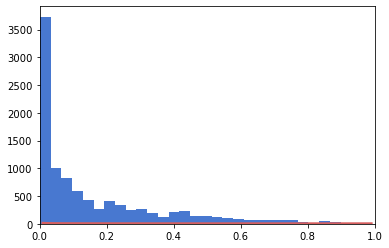

In [14]:
np.random.seed(345)
func=stats.beta(0.4,2)
samples = metropolis(func=func)
x=np.linspace(0.01,.99,100)
y=func.pdf(x)
plt.xlim(0,1)
plt.plot(x,y,'r-',lw=3,label='True Distribution')
plt.hist(samples,bins=30, normed=True, label ='Estimated Distribution')
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$pdf(x)$',fontsize=14)
plt.legend(fontsize=14)